# Tema 1- laborator 2 
#### Exercițiul 1 - enunț
Scrieţi un program în Python care să preia ca input un fişier .csv cu o listă oarecare şi să aibă ca output un număr
predeterminat de elemente din acea listă, fără repetiţie. Aplicaţi pe lista studenţilor din grupa dumneavoastră care nu
au prezentat încă o temă.

Notă: Pentru generarea unui eşantion aleator se poate apela funcţia sample din modulul random sau funcţia random.choice cu argumentul replace=False din librăria Numpy.


##### Rezolvare
În rezolvarea acestei probleme, am considerat că fiecare nume se află pe o linie diferită în fișierul csv. Am ales să folosesc funcția random.choice. 


In [97]:
import csv
import numpy as np

def functieStudRandom(nrStudenti):
    with open('studenti.csv',mode='r') as fisier:
        listaStudenti = list(csv.reader(fisier))
        print("studenti: ", listaStudenti)
        # operatiile de set nu se aplica pe listaStudenti, asa ca transformam fiecare row in tuplu
        studenti_tuplu = [tuple(row) for row in listaStudenti] 
        # apoi eliminam duplicatele si transformam in lista 
        studenti_unici = list(set(studenti_tuplu))
        print("studenti unici: ", studenti_unici)
        studenti=[''.join(row) for row in studenti_unici]
        # studenti acum contine ca elemente doar stringuri 
        print("studenti unici: ", studenti)
        if nrStudenti<len(studenti):
            return np.random.choice(studenti,nrStudenti,replace=False)
        else: return -1


print('studentii alesi random: ',functieStudRandom(4))

studenti:  [['Ion Ionescu'], ['Maria Ionescu'], ['Ion Ionel'], ['Mario A'], ['Marian B'], ['Iulia C'], ['Iulia C']]
studenti unici:  [('Mario A',), ('Ion Ionescu',), ('Iulia C',), ('Maria Ionescu',), ('Marian B',), ('Ion Ionel',)]
studenti unici:  ['Mario A', 'Ion Ionescu', 'Iulia C', 'Maria Ionescu', 'Marian B', 'Ion Ionel']
studentii alesi random:  ['Marian B' 'Iulia C' 'Ion Ionel' 'Mario A']


#### Exercițiul 2 - enunț
Doi prieteni joacă următorul joc, după următoarele reguli:

Pasul 1. Primul jucător aruncă cu o monedă.

● Dacă pică stemă, cel de-al doilea trebuie să arunce cu zarul şi să-i dea primului o sumă egală z − 3, unde z
este rezultatul aruncării cu zarul (a da o sumă negativă este echivalent cu a lua opusul acelei sume). Jocul
se încheie aici.

● Dacă pică ban, atunci primul jucător trebuie să-i dea celui de-al doilea 0.5 $.

Pasul n. În caz că jocul nu s-a încheiat, se reia pasul 1.

Astfel, jocul se opreşte la pasul corespunzător obţinerii stemei de către primul jucător.
a) Ce fel de distribuţie urmează N, numărul de paşi ai jocului?
b) Simulaţi în Python un astfel de joc. Variabilele care ne interesează sunt N şi suma totală S pe care cel de-al
doilea jucător trebuie să i-o dea primului.
c) Prin simularea unui număr mare de astfel de jocuri, determinaţi cu aproximaţie media lui S şi reprezentaţi grafic
(printr-o histogramă) distribuţia acesteia.
d) Ce se întâmplă dacă moneda este măsluită? Încercaţi să refaceţi pct. c) cu o probabilitate de apariţie a stemei
p = 0.3, respectiv p = 0.7. 

#### Rezolvare

a) Se urmează o distribuție geometrică. (se joacă până pică stema)

b) Până pică stema, se adaugă 0.5 dolari la suma pe care primul jucător i-o datorează celui de-al doilea și se contorizează numărul de pași. Când pică stema, ne oprim din a arunca moneda și aruncăm zarul, generând de fapt o valoare întregă cuprinsă între 1 și 6 inclusiv). Calculăm suma(zar-3) și afișăm rezultatul. 

In [33]:
import numpy as np

datoriePrimulJ= 0
moneda= np.random.choice(['ban','stema'])
nrPasi=1
while(moneda=='ban'):
    nrPasi=nrPasi+1
    datoriePrimulJ= datoriePrimulJ+ 0.5
    moneda= np.random.choice(['ban','stema'])
        
# am ajuns la cazul final, s-a aruncat stema. 
print("Acesta este numarul de pasi: N="+ str(nrPasi))
zar=np.random.randint(1,7)
suma=zar-3
if suma<0: suma=suma*(-1)
print("primul jucator ii datoreaza celui de-al doilea suma "+ str(datoriePrimulJ))
print("zar: "+str(zar)+ "; al doilea jucator ii datoreaza primului: S= "+ str(suma)+" dolari")
        

Acesta este numarul de pasi: N=1
primul jucator ii datoreaza celui de-al doilea suma 0
zar: 3; al doilea jucator ii datoreaza primului: S= 0 dolari


c) Modificăm codul de mai sus pentru a reține într-o listă sumele pe care cel de-al doilea jucător i le datorează primului. 
Calculăm media și generăm histograma.

[2, 2, 1, 2, 3, 2, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2, 2, 1, 2, 2, 0, 0, 2, 3, 2, 1, 2, 1, 1, 1, 2, 2, 3, 2, 2, 1, 1, 3, 2, 1, 0, 3, 2, 0, 3, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 3, 1, 3, 1, 3, 2, 3, 2, 0, 3, 1, 1, 1, 1, 0, 0, 2, 1, 1, 1, 1, 2, 3, 2, 1, 3, 2, 1, 1, 0, 2, 2, 1, 3, 2]
1.54


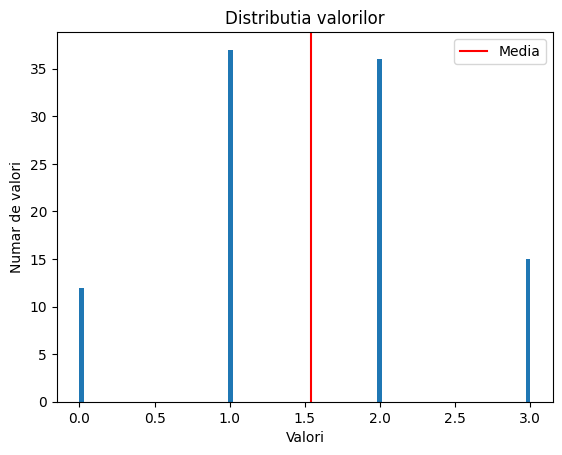

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def simulare(nrJocuri):
    sumeFinale=[]
    for i in range(nrJocuri): 
        datoriePrimulJ= 0
        #print("suntem la jocul " + str(i+1))
        moneda= np.random.choice(['ban','stema'])
        nrPasi=1
        while(moneda=='ban'):
            nrPasi=nrPasi+1
            datoriePrimulJ= datoriePrimulJ+ 0.5
            moneda= np.random.choice(['ban','stema'])
        
        # am ajuns la cazul final, s-a aruncat stema. 
        #print("Acesta este numarul de pasi: N="+ str(nrPasi))
        zar=np.random.randint(1,7)
        suma=zar-3
        if suma<0: suma=suma*(-1)
        #print("primul jucator ii datoreaza celui de-al doilea suma "+ str(datoriePrimulJ))
        #print("al doilea jucator ii datoreaza primului: S="+ str(suma)+" dolari")
        sumeFinale.append(suma)

    return sumeFinale

jocuri=100
rezultate=simulare(jocuri)
print(rezultate)
media=np.mean(rezultate) #calculam media
print(media)
plt.hist(rezultate, bins=jocuri)
plt.title('Distributia valorilor')
plt.xlabel('Valori')
plt.ylabel('Numar de valori')
plt.axvline(media, color='red', label='Media')
plt.legend()
plt.show()

d) Am refăcut punctul c, adăugând la funcția random.choice ca parametru probabilitățile stemei și ale banului. 
Dacă moneda este măsluită, asta înseamnă că este mai probabil ca jocul să țină mai mult pentru p=0.3 a stemei, sau mai puțin pentru p=0.7 a stemei. 

[2, 2, 1, 2, 1, 2, 0, 3, 3, 2, 1, 2, 2, 2, 0, 1, 2, 1, 1, 2, 2, 0, 3, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 3, 0, 3, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 3, 1, 3, 3, 1, 3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 0, 1, 0, 3, 0, 2, 3, 3, 1, 1, 1, 2, 0, 2, 0, 1, 0, 3, 1, 0, 2, 2, 2, 2]
1.49


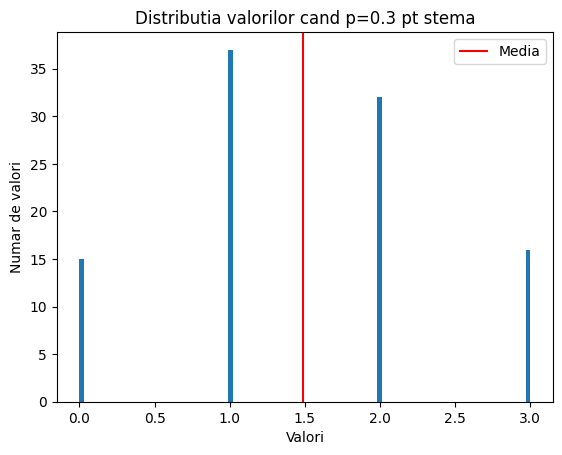

In [54]:
# aici stema are probabilitate de 0.3 
import numpy as np
import matplotlib.pyplot as plt

def simulare(nrJocuri):
    sumeFinale=[]
    for i in range(nrJocuri): 
        datoriePrimulJ= 0
        #print("suntem la jocul " + str(i+1))
        moneda= np.random.choice(['ban','stema'],p=[0.7,0.3])
        #stema are probabilitate de 0.3 
        nrPasi=1
        while(moneda=='ban'):
            nrPasi=nrPasi+1
            datoriePrimulJ= datoriePrimulJ+ 0.5
            moneda= np.random.choice(['ban','stema'],p=[0.7,0.3])
        
        # am ajuns la cazul final, s-a aruncat stema. 
        #print("Acesta este numarul de pasi: N="+ str(nrPasi))
        zar=np.random.randint(1,7)
        suma=zar-3
        if suma<0: suma=suma*(-1)
        #print("primul jucator ii datoreaza celui de-al doilea suma "+ str(datoriePrimulJ))
        #print("al doilea jucator ii datoreaza primului: S="+ str(suma)+" dolari")
        sumeFinale.append(suma)

    return sumeFinale

jocuri=100
rezultate=simulare(jocuri)
print(rezultate)
media=np.mean(rezultate) #calculam media exacta
print(media)
plt.hist(rezultate, bins=jocuri)
plt.title('Distributia valorilor cand p=0.3 pt stema')
plt.xlabel('Valori')
plt.ylabel('Numar de valori')
plt.axvline(media, color='red', label='Media')
plt.legend()
plt.show()

[2, 3, 0, 2, 1, 1, 3, 1, 1, 0, 1, 3, 2, 0, 0, 2, 1, 3, 2, 1, 1, 1, 3, 3, 2, 3, 1, 1, 3, 1, 1, 2, 0, 0, 3, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 2, 0, 3, 2, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 3, 1, 3, 2, 2, 1, 1, 3, 1, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1]
1.57


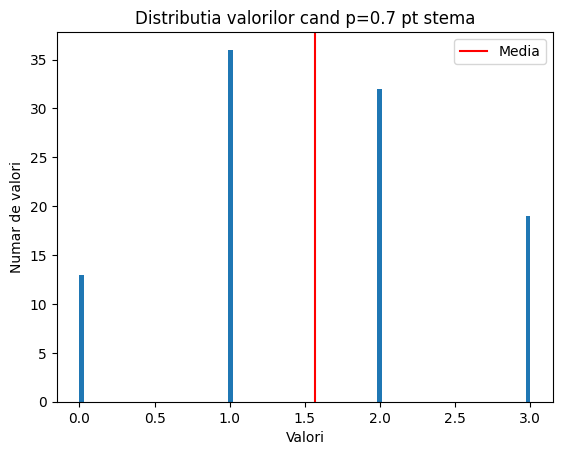

In [53]:
# aici stema are probabilitate de 0.7 
import numpy as np
import matplotlib.pyplot as plt

def simulare(nrJocuri):
    sumeFinale=[]
    for i in range(nrJocuri): 
        datoriePrimulJ= 0
        #print("suntem la jocul " + str(i+1))
        moneda= np.random.choice(['ban','stema'],p=[0.3,0.7])
        #stema are probabilitate de 0.3 
        nrPasi=1
        while(moneda=='ban'):
            nrPasi=nrPasi+1
            datoriePrimulJ= datoriePrimulJ+ 0.5
            moneda= np.random.choice(['ban','stema'],p=[0.3,0.7])
        
        # am ajuns la cazul final, s-a aruncat stema. 
        #print("Acesta este numarul de pasi: N="+ str(nrPasi))
        zar=np.random.randint(1,7)
        suma=zar-3
        if suma<0: suma=suma*(-1)
        #print("primul jucator ii datoreaza celui de-al doilea suma "+ str(datoriePrimulJ))
        #print("al doilea jucator ii datoreaza primului: S="+ str(suma)+" dolari")
        sumeFinale.append(suma)

    return sumeFinale

jocuri=100
rezultate=simulare(jocuri)
print(rezultate)
media=np.mean(rezultate) #calculam media exacta
print(media)
plt.hist(rezultate, bins=jocuri)
plt.title('Distributia valorilor cand p=0.7 pt stema')
plt.xlabel('Valori')
plt.ylabel('Numar de valori')
plt.axvline(media, color='red', label='Media')
plt.legend()
plt.show()

#### Exercițiul 3 - enunț
Într-o frizerie, trei frizeri îşi tund clienţii cu următoarele viteze medii: primul cu 3 clienţi pe oră, al doilea cu 6 pe oră iar al treilea cu 4 pe oră. Astfel, timpul de servire al unui client este modelat de distribuţii exponenţiale cu parametrii
λ1 = 3 h−1
, λ2 = 6 h−1
, respectiv λ3 = 4 h−1
, iar probabilităţile de preluare a unui client de către un anumit frizer sunt 3/13, 6/13, respectiv 4/13 (de ce?). Fie X timpul de servire pentru un client.
Generaţi 10000 de valori pentru X, şi în felul acesta estimaţi media şi deviaţia standard a lui X. Realizaţi un grafic
aproximativ al densităţii distribuţiei lui X.
Notă: Distribuţia Exp(λ) se poate apela prin random.exponential(scale=1/λ) în Numpy, sau cu stats.expon(scale=1/λ)
în Scipy. Având în vedere că X are o distribuţie continuă, densitatea aproximativă acesteia se poate vizualiza folosind
funcţia plot_kde din librăria Arviz.

#### Rezolvare

În primul rând, răspunsul la întrebarea din enunț constă în faptul că fiecare frizer are probabilitatea de a fi ales de un client egală cu numărul clienților pentru care poate oferi servicii (în funcție de viteza sa), împărțit la numărul de clienți totali într-o oră. 

Media lui X: 0.23119872467147115
Deviatia lui X: 0.2521259893799781


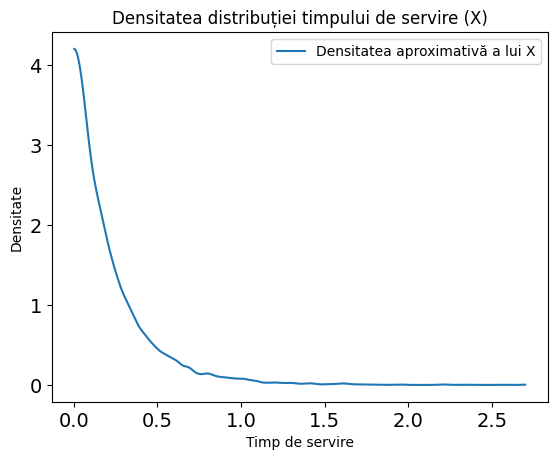

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

lambdas = [3, 6, 4] 
probabilitati = [3/13, 6/13, 4/13] 
num_samples = 10000
samples = []

for _ in range(num_samples):
    frizer = np.random.choice([0, 1, 2], p=probabilitati)
    sample = np.random.exponential(scale=1/lambdas[frizer])
    samples.append(sample)

samples=np.array(samples)
medie = np.mean(samples)
dev = np.std(samples)

print(f"Media lui X: {medie}")
print(f"Deviatia lui X: {dev}")
az.plot_kde(samples, label='Densitatea aproximativă a lui X')
plt.title("Densitatea distribuției timpului de servire (X)")
plt.xlabel("Timp de servire")
plt.ylabel("Densitate")
plt.legend()
plt.show()
